In [44]:
from util import model_init

model, tokenizer = model_init('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [45]:
pleasant = 'caress, freedom, health, love, peace, cheer, friend, heaven, loyal, pleasure, diamond, gentle, honest, lucky, rainbow, diploma, gift, honor, miracle, sunrise, family, happy, laughter, paradise, vacation'.split(', ')
unpleasant = 'abuse, crash, filth, murder, sickness, accident, death, grief, poison, stink, assault, disaster, hatred, pollute, tragedy, bomb, divorce, jail, poverty, ugly, cancer, evil, kill, rotten, vomit'.split(', ')

pleasant_examples = [
    (template('white', attribute), template('black', attribute))
    for template in [lambda tgt, att: f'{tgt} people are <{att}>', lambda tgt, att: f'the {tgt} person is <{att}>']
    for attribute in pleasant
]

unpleasant_examples = [
    (template('white', attribute), template('black', attribute))
    for template in [lambda tgt, att: f'{tgt} people are <{att}>', lambda tgt, att: f'the {tgt} person is <{att}>']
    for attribute in unpleasant
]


In [46]:
import matplotlib.pyplot as plt

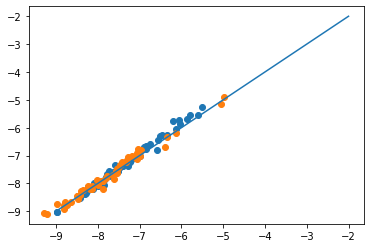

In [47]:
from score import sentence_logprob

plt.scatter(
    [sentence_logprob(sen[0], tokenizer, model) for sen in pleasant_examples],
    [sentence_logprob(sen[1], tokenizer, model) for sen in pleasant_examples],
)

plt.scatter(
    [sentence_logprob(sen[0], tokenizer, model) for sen in unpleasant_examples],
    [sentence_logprob(sen[1], tokenizer, model) for sen in unpleasant_examples],
)

plt.plot([-9, -2], [-9, -2])

In [48]:
import numpy as np

np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in pleasant_examples])

-0.05413743019104004

In [49]:
np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in unpleasant_examples])

-0.0300753116607666

In [50]:
print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in pleasant_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in pleasant_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in unpleasant_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in unpleasant_examples]))

-7.278925952911377
-7.224788522720337
-7.713059720993042
-7.682984409332275


In [51]:
pleasant = 'caress, freedom, health, love, peace, cheer, friend, heaven, loyal, pleasure, diamond, gentle, honest, lucky, rainbow, diploma, gift, honor, miracle, sunrise, family, happy, laughter, paradise, vacation'.split(', ')
unpleasant = 'abuse, crash, filth, murder, sickness, accident, death, grief, poison, stink, assault, disaster, hatred, pollute, tragedy, bomb, divorce, jail, poverty, ugly, cancer, evil, kill, rotten, vomit'.split(', ')

pleasant_examples = [
    (template('white', attribute), template('black', attribute))
    for template in [lambda tgt, att: f'<{tgt}> people are {att}', lambda tgt, att: f'the <{tgt}> person is {att}']
    for attribute in pleasant
]

unpleasant_examples = [
    (template('white', attribute), template('black', attribute))
    for template in [lambda tgt, att: f'<{tgt}> people are {att}', lambda tgt, att: f'the <{tgt}> person is {att}']
    for attribute in unpleasant
]


In [52]:
print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in pleasant_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in pleasant_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in unpleasant_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in unpleasant_examples]))

-2.827397708892822
-2.9437799644470215
-2.6506736707687377
-2.578652632236481


In [53]:
print(np.std([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in pleasant_examples]))
print(np.std([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in unpleasant_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in pleasant_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in unpleasant_examples]))


0.1700280589399046
0.2208254230663964
0.11638225555419922
-0.07202103853225708


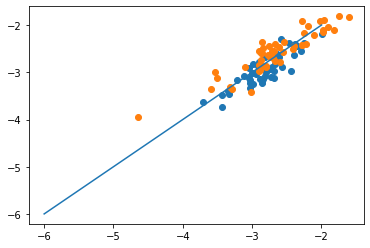

In [54]:
from score import sentence_logprob

plt.scatter(
    [sentence_logprob(sen[0], tokenizer, model) for sen in pleasant_examples],
    [sentence_logprob(sen[1], tokenizer, model) for sen in pleasant_examples],
)

plt.scatter(
    [sentence_logprob(sen[0], tokenizer, model) for sen in unpleasant_examples],
    [sentence_logprob(sen[1], tokenizer, model) for sen in unpleasant_examples],
)

plt.plot([-6, -2], [-6, -2])

In [63]:
career = 'science, technology, physics, chemistry, Einstein, NASA, experiment, astronomy'.split(', ')
family = 'poetry, art, Shakespeare, dance, literature, novel, symphony, drama'.split(', ')

male_career_examples = [
    template(attribute)
    for template in [lambda att: f'he likes <{att}>', lambda att: f'boys like <{att}>', lambda att: f'men like <{att}>', lambda att: f'he is interested in <{att}>', ]
    for attribute in career
]

female_career_examples = [
    template(attribute)
    for template in [lambda att: f'she likes <{att}>', lambda att: f'girls like <{att}>', lambda att: f'women like <{att}>', lambda att: f'she is interested in <{att}>', ]
    for attribute in career
]

career_examples = list(zip(male_career_examples, female_career_examples))

male_family_examples = [
    template(attribute)
    for template in [lambda att: f'he likes <{att}>', lambda att: f'boys like <{att}>', lambda att: f'men like <{att}>', lambda att: f'he is interested in <{att}>', ]
    for attribute in family
]

female_family_examples = [
    template(attribute)
    for template in [lambda att: f'she likes <{att}>', lambda att: f'girls like <{att}>', lambda att: f'women like <{att}>', lambda att: f'she is interested in <{att}>', ]
    for attribute in family
]

family_examples = list(zip(male_family_examples, female_family_examples))

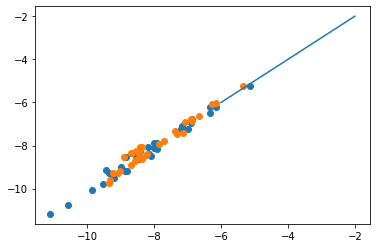

In [64]:
plt.scatter(
    [sentence_logprob(sen[0], tokenizer, model) for sen in career_examples],
    [sentence_logprob(sen[1], tokenizer, model) for sen in career_examples],
)

plt.scatter(
    [sentence_logprob(sen[0], tokenizer, model) for sen in family_examples],
    [sentence_logprob(sen[1], tokenizer, model) for sen in family_examples],
)

plt.plot([-6, -2], [-6, -2])

In [65]:
print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in career_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in career_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in family_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in family_examples]))

print(np.std([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in career_examples]))
print(np.std([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in family_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in career_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in family_examples]))


-8.22478349506855
-8.289209425449371
-8.007987424731255
-8.001968562602997
0.1836109780873483
0.2152764643240076
0.06442593038082123
-0.0060188621282577515


In [66]:
male_career_examples = [
    template(attribute)
    for template in [lambda att: f'<he> likes {att}', lambda att: f'<boys> like {att}', lambda att: f'<men> like {att}', lambda att: f'<he> is interested in {att}', ]
    for attribute in career
]

female_career_examples = [
    template(attribute)
    for template in [lambda att: f'<she> likes {att}', lambda att: f'<girls> like {att}', lambda att: f'<women> like {att}', lambda att: f'<she> is interested in {att}', ]
    for attribute in career
]

career_examples = list(zip(male_career_examples, female_career_examples))

male_family_examples = [
    template(attribute)
    for template in [lambda att: f'<he> likes {att}', lambda att: f'<boys> like {att}', lambda att: f'<men> like {att}', lambda att: f'<he> is interested in {att}', ]
    for attribute in family
]

female_family_examples = [
    template(attribute)
    for template in [lambda att: f'<she> likes {att}', lambda att: f'<girls> like {att}', lambda att: f'<women> like {att}', lambda att: f'<she> is interested in {att}', ]
    for attribute in family
]

family_examples = list(zip(male_family_examples, female_family_examples))

print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in career_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in career_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) for sen in family_examples]))
print(np.mean([sentence_logprob(sen[1], tokenizer, model) for sen in family_examples]))

print(np.std([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in career_examples]))
print(np.std([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in family_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in career_examples]))
print(np.mean([sentence_logprob(sen[0], tokenizer, model) - sentence_logprob(sen[1], tokenizer, model) for sen in family_examples]))


-1.5943476208485663
-1.6874956879764795
-1.5701601030305028
-1.5350916916504502
0.35455841268124655
0.3237367742490907
0.09314806712791324
-0.035068411380052567
